In [1]:
import pandas as pd
all_internationals = 'C:/Users/killi/OneDrive/Desktop/Kaggle_results_rugby/all_internationals.csv'
all_internationals_df = pd.read_csv(all_internationals)

Pacific_nations = 'C:/Users/killi/OneDrive/Desktop/Kaggle_results_rugby/Pacific_nations.csv'
Autumn_internationals = 'C:/Users/killi/OneDrive/Desktop/Kaggle_results_rugby/Autumn_internationals.csv'

Pacific_nations_df = pd.read_csv(Pacific_nations)
Autumn_internationals_df = pd.read_csv(Autumn_internationals)

# Ensure your date column is in datetime format
all_internationals_df['date'] = pd.to_datetime(all_internationals_df['date'])

# Filter for dates from January 1, 2024, onwards
filtered = all_internationals_df[all_internationals_df['date'] >= '2010-01-01']

Pacific_autumn = pd.concat([Pacific_nations_df, Autumn_internationals_df]).reset_index(drop=True)

# Rename specific columns
Pacific_autumn = Pacific_autumn.rename(columns={
    'Date': 'date',
    'Home Team': 'home_team',
    'Away Team': 'away_team',
    'Home Score':'home_score',
    'Away Score':'away_score'
})

# Ensure your date column is in datetime format
Pacific_autumn['date'] = pd.to_datetime(Pacific_autumn['date'])

filtered = filtered[['date','home_team','away_team','home_score','away_score']]

# Combine all data
all_scores = pd.concat([filtered, Pacific_autumn]).reset_index(drop=True)


# Create arrays to be used by PYMC
home_score_arr = all_scores['home_score'].values
away_score_arr = all_scores['away_score'].values


C:\Users\killi\AppData\Local\Temp\ipykernel_30988\3079541321.py:29: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Pacific_autumn['date'] = pd.to_datetime(Pacific_autumn['date'])


Home score mean:  24.77466666666667
Home score median:  23.0
Home score mode:  23
Home score std:  12.180143330665512


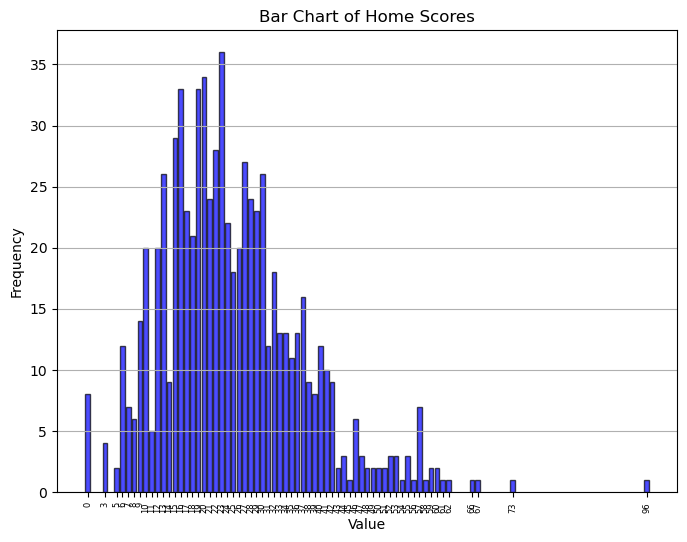

Away score mean:  21.110666666666667
Away score median:  19.0
Away score mode:  13
Away score std:  11.566607953741476


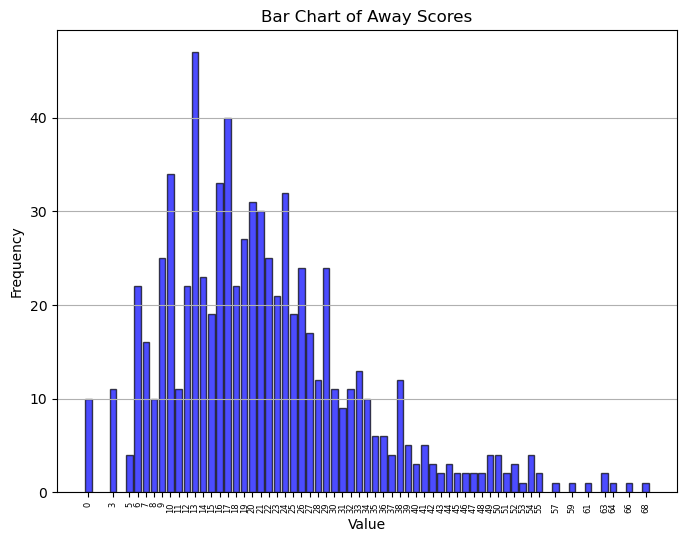

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import mode

# Plot Home Scores
# Get statistics
print('Home score mean: ', np.mean(home_score_arr))
print('Home score median: ', np.median(home_score_arr))
print('Home score mode: ', mode(home_score_arr)[0])
print('Home score std: ', np.std(home_score_arr))

# Count frequencies for each unique score
home_score_counts = Counter(home_score_arr)
unique_home_scores = sorted(home_score_counts.keys())
home_frequencies = [home_score_counts[score] for score in unique_home_scores]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(unique_home_scores, home_frequencies, color="blue", edgecolor="black", alpha=0.7)

# Add x ticks
plt.xticks(unique_home_scores, rotation=90, fontsize=6)

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Bar Chart of Home Scores")
plt.grid(axis="y")
plt.show()

# Plot Away Scores
# Get statistics
print('Away score mean: ', np.mean(away_score_arr))
print('Away score median: ', np.median(away_score_arr))
print('Away score mode: ', mode(away_score_arr)[0])
print('Away score std: ', np.std(away_score_arr))

# Count frequencies for each unique score
away_score_counts = Counter(away_score_arr)
unique_away_scores = sorted(away_score_counts.keys())
away_frequencies = [away_score_counts[score] for score in unique_away_scores]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(unique_away_scores, away_frequencies, color="blue", edgecolor="black", alpha=0.7)

# Add x ticks
plt.xticks(unique_away_scores, rotation=90, fontsize=6)

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Bar Chart of Away Scores")
plt.grid(axis="y")
plt.show()
